In [58]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
SHED_2022 = pd.read_csv("public2022.csv")

In [60]:
test_2022 = SHED_2022[["caseid2021","B3","C3","C3A","C3B","C4A","inc_4cat_50k","R11","SL6","I12","EF1","EF2","EF5A","EF5B","EF7","E1_a","E1_b","E1_c","E1_d","E1_e","I40","I0_a","I39","K5A","I21_a","I21_b","K0","INF3_a","INF3_b","INF3_c","INF3_d","INF3_e","INF3_f","INF3_g"]]

In [61]:
filtered_2022 = test_2022.loc[test_2022["caseid2021"].notnull()]

In [62]:
overlap_2021 = list(filtered_2022["caseid2021"].values)

In [63]:
SHED_2021 = pd.read_csv("public2021.csv")

In [64]:
test_2021 = SHED_2021[["CaseID","CTC1","I40","ppinc7","CTC3"]]

In [65]:
filtered_2021_a = test_2021.loc[test_2021["CaseID"].isin(overlap_2021)]

In [66]:
income_filter = ["$150,000 to $199,999","$200,000 or higher"]

In [67]:
filtered_2021 = filtered_2021_a[filtered_2021_a['I40'].isin(income_filter) == False]

In [68]:
filtered_2021

,CaseID,CTC1,I40,ppinc7,CTC3
4,6,NaN,"$25,000 to $39,999","$50,000 to $74,999",NaN
6,8,NaN,"$50,000 to $74,999","$50,000 to $74,999",NaN
7,9,NaN,"$75,000 to $99,999","$150,000 or more",NaN
15,17,NaN,"$15,000 to $24,999","$25,000 to $49,999",NaN
20,22,NaN,$0,"$150,000 or more",NaN
...,...,...,...,...,...
11825,11917,NaN,"$25,000 to $39,999","$25,000 to $49,999",NaN
11840,11932,NaN,$0,"Less than $10,000",NaN
11842,11934,NaN,"$5,000 to $14,999","$75,000 to $99,999",NaN
11845,11937,NaN,"$25,000 to $39,999","$100,000 to $149,999",NaN


In [69]:
no_ctc_2021 = filtered_2021.loc[filtered_2021["CTC1"] == "No"]
no_ctc_2021_values = list(no_ctc_2021["CaseID"].values)

In [70]:
no_ctc_2021

,CaseID,CTC1,I40,ppinc7,CTC3
310,315,No,"$5,000 to $14,999","Less than $10,000",NaN
814,823,No,"$15,000 to $24,999","$10,000 to $24,999",NaN
924,934,No,"$100,000 to $149,999","$25,000 to $49,999",NaN
979,990,No,"$75,000 to $99,999","$75,000 to $99,999",NaN
1001,1012,No,"$15,000 to $24,999","Less than $10,000",NaN
...,...,...,...,...,...
11023,11112,No,"$75,000 to $99,999","$75,000 to $99,999",NaN
11104,11193,No,"$100,000 to $149,999","$100,000 to $149,999",NaN
11278,11367,No,"$75,000 to $99,999","$75,000 to $99,999",NaN
11385,11474,No,"$1 to $4,999","$25,000 to $49,999",NaN


In [71]:
yes_ctc_2021 = filtered_2021.loc[filtered_2021["CTC1"] == "Yes"]
yes_ctc_2021_values = list(yes_ctc_2021["CaseID"].values)

In [72]:
yes_ctc_2021

,CaseID,CTC1,I40,ppinc7,CTC3
40,42,Yes,"$25,000 to $39,999","$25,000 to $49,999",Saved it
93,95,Yes,"$100,000 to $149,999","$100,000 to $149,999",Paid off debt
190,194,Yes,"$50,000 to $74,999","$75,000 to $99,999","Spent on rent, mortgage, or utilities"
213,217,Yes,"$100,000 to $149,999","$100,000 to $149,999",Spent on other things
259,263,Yes,"$40,000 to $49,999","$10,000 to $24,999",Spent on other things for child
...,...,...,...,...,...
11476,11565,Yes,"$5,000 to $14,999","$75,000 to $99,999",Spent on other things for child
11494,11583,Yes,"$1 to $4,999","Less than $10,000",Spent on food
11634,11725,Yes,"$40,000 to $49,999","$50,000 to $74,999","Spent on rent, mortgage, or utilities"
11750,11841,Yes,"$15,000 to $24,999","Less than $10,000",Spent on food


In [73]:
no_ctc_2022 = filtered_2022.loc[filtered_2022["caseid2021"].isin(yes_ctc_2021_values)]

In [74]:
yes_ctc_2022 = filtered_2022.loc[filtered_2022["caseid2021"].isin(no_ctc_2021_values)]

In [75]:
b3_no_ctc = no_ctc_2022.groupby("B3").count()
b3_no_ctc

,caseid2021,C3,C3A,C3B,C4A,inc_4cat_50k,R11,SL6,I12,EF1,EF2,EF5A,EF5B,EF7,E1_a,E1_b,E1_c,E1_d,E1_e,I40,I0_a,I39,K5A,I21_a,I21_b,K0,INF3_a,INF3_b,INF3_c,INF3_d,INF3_e,INF3_f,INF3_g
B3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
About the same,178,148,67,81,148,178,44,28,53,178,82,178,150,178,178,178,178,178,178,178,178,178,170,178,178,170,178,178,178,178,178,178,27
Much better off,24,20,8,12,20,24,8,11,13,24,8,24,19,24,24,24,24,24,24,24,24,24,23,24,24,23,24,24,24,24,24,24,9
Much worse off,42,32,23,9,32,42,18,6,17,42,32,42,20,42,42,42,42,42,42,42,42,42,40,42,42,40,42,42,42,42,42,42,4
Somewhat better off,62,54,26,28,54,62,19,12,21,62,34,62,49,62,62,62,62,62,62,62,62,62,61,62,62,61,62,62,62,62,62,62,13
Somewhat worse off,111,93,55,38,93,111,33,17,40,111,72,111,71,111,111,111,111,111,111,111,111,111,106,111,111,106,111,111,111,111,111,111,31


In [76]:
b3_yes_ctc = yes_ctc_2022.groupby("B3").count()
b3_yes_ctc

,caseid2021,C3,C3A,C3B,C4A,inc_4cat_50k,R11,SL6,I12,EF1,EF2,EF5A,EF5B,EF7,E1_a,E1_b,E1_c,E1_d,E1_e,I40,I0_a,I39,K5A,I21_a,I21_b,K0,INF3_a,INF3_b,INF3_c,INF3_d,INF3_e,INF3_f,INF3_g
B3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
About the same,56,39,15,24,39,56,18,8,19,56,32,56,40,56,56,56,56,56,56,56,56,56,53,56,56,53,56,56,56,56,56,56,3
Much better off,8,7,3,4,7,8,4,3,1,8,4,8,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,1
Much worse off,9,7,2,5,7,9,3,1,5,9,7,9,5,9,9,9,9,9,9,9,9,9,8,9,9,8,9,9,9,9,9,9,1
Somewhat better off,35,30,17,13,30,35,12,5,9,35,19,35,31,35,35,35,35,35,35,35,35,35,28,35,35,28,35,35,35,35,35,35,3
Somewhat worse off,32,25,16,9,25,32,11,7,11,32,19,32,20,32,32,32,32,32,32,32,32,32,29,32,32,29,32,32,32,32,32,32,6


In [77]:
b3_yes_val = list(b3_yes_ctc["caseid2021"].values)
b3_no_val =  list(b3_no_ctc["caseid2021"].values)
b3_yes_percentage = [int(i / sum(b3_yes_val) * 100) for i in b3_yes_val]
b3_no_percentage = [int(i / sum(b3_no_val) * 100) for i in b3_no_val]

In [78]:
B3_comparison = pd.DataFrame()

In [79]:
order_for_b3 = [1,3,0,4,2]
b3_yes_percentage = [b3_yes_percentage[i] for i in order_for_b3]
b3_no_percentage = [b3_no_percentage[i] for i in order_for_b3]

In [80]:
#Compared to 12 months ago, would you say that you (and your family) are better off, the same, or worse off financially? 
B3_comparison["Response"] = ["Much better off","Somewhat better off","About the same","Somewhat worse off","Much worse off"]
B3_comparison["yes_ctc"] = b3_yes_percentage
B3_comparison["no_ctc"] = b3_no_percentage

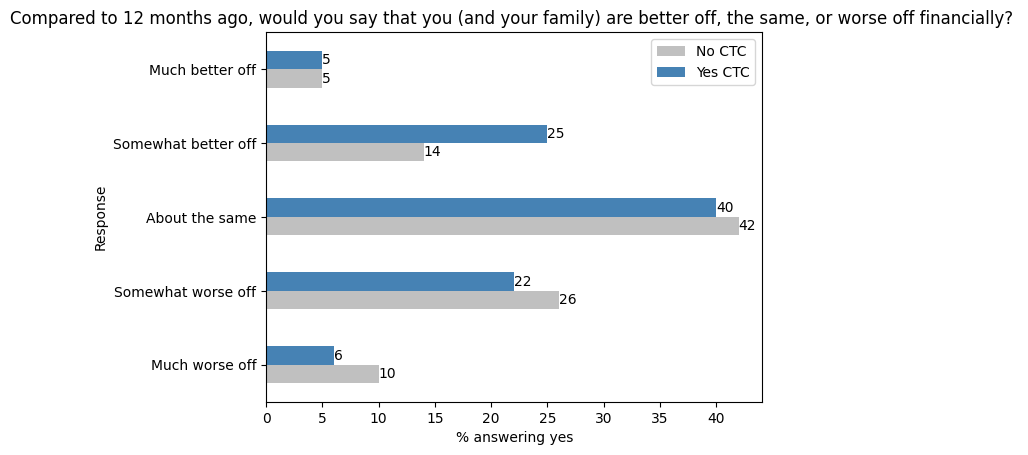

In [81]:
index = ['Much worse off','Somewhat worse off','About the same','Somewhat better off','Much better off']
b3_comp = pd.DataFrame({'No CTC': [10,26,42,14,5],
                   'Yes CTC': [6,22,40,25,5]}, index=index)
b3_comp_graph = b3_comp.plot.barh(rot=0,color = {"No CTC": "silver", "Yes CTC": "steelblue"})
b3_comp_graph.set_xlabel("% answering yes")
b3_comp_graph.set_ylabel("Response")
b3_comp_graph.set_title("Compared to 12 months ago, would you say that you (and your family) are better off, the same, or worse off financially? ")
for container in b3_comp_graph.containers:
    b3_comp_graph.bar_label(container,fmt="%d")

In [82]:
#Do you currently have more, less, or about the same amount of credit card debt than you had 12 months ago? 
C3A_comparison = pd.DataFrame()
C3A_comparison["Response"] = ["Less debt now","About the same","More debt now"]
C3A_comparison["no_ctc"] = [int(23/179 * 100),int(62/179 *100),int(94/179 * 100)]
C3A_comparison["yes_ctc"] = [int(16/53 * 100),int(16/53 *100),int(21/53 * 100)]

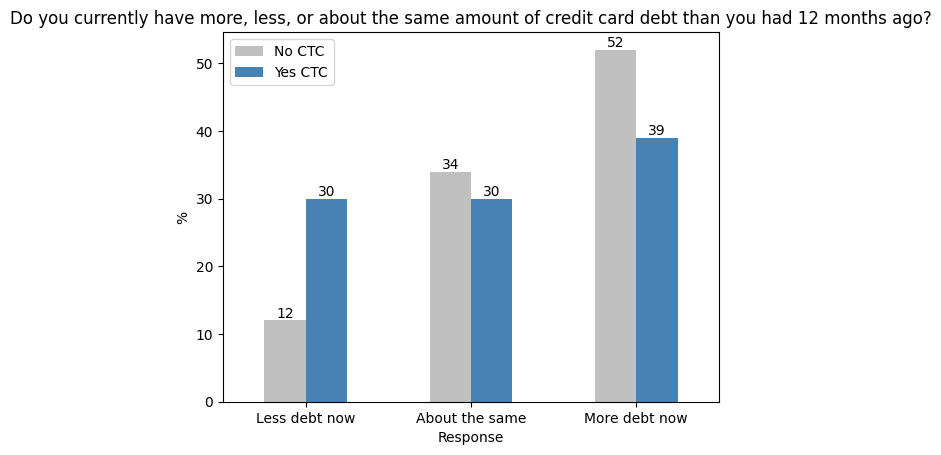

In [83]:
index = ['Less debt now','About the same','More debt now']
C3A_comp = pd.DataFrame({'No CTC': [12,34,52],
                   'Yes CTC': [30,30,39]}, index=index)
C3A_comp_graph = C3A_comp.plot.bar(rot=0, color = {"No CTC": "silver", "Yes CTC": "steelblue"})
C3A_comp_graph.set_xlabel("Response")
C3A_comp_graph.set_ylabel("%")
C3A_comp_graph.set_title("Do you currently have more, less, or about the same amount of credit card debt than you had 12 months ago?")
for container in C3A_comp_graph.containers:
    C3A_comp_graph.bar_label(container,fmt="%d")

In [84]:
#12 months ago, did you have any credit card debt that you have since paid off?
C3B_comparison = pd.DataFrame()
C3B_comparison["Response"] = ["no","yes"]
C3B_comparison["no_ctc"] = [int(126/168 * 100),int(42/168 *100)]
C3B_comparison["yes_ctc"] = [int(42/55 * 100),int(13/55 *100)]
C3B_comparison

,Response,no_ctc,yes_ctc
0,no,75,76
1,yes,25,23


In [85]:
#Because your income varies, have you (and your spouse or partner) struggled to pay your bills in the past 12 months? 
I12_comparison = pd.DataFrame()
I12_comparison["Response"] = ["no","yes"]
I12_comparison["no_ctc"] = [int(70/144 * 100),int(74/144 *100)]
I12_comparison["yes_ctc"] = [int(28/45 * 100),int(17/45 *100)]
I12_comparison

,Response,no_ctc,yes_ctc
0,no,48,62
1,yes,51,37


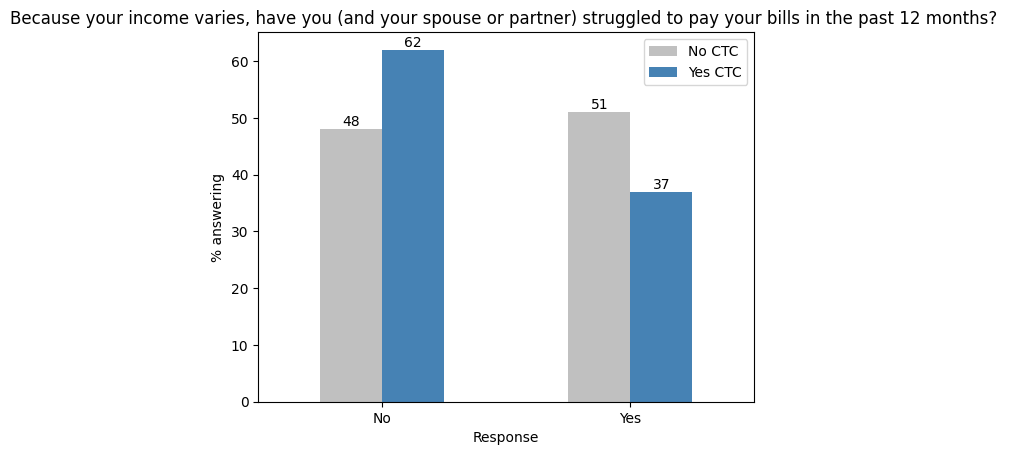

In [86]:
index = ['No','Yes']
I12_comp = pd.DataFrame({'No CTC': [48,51],
                   'Yes CTC': [62,37]}, index=index)
I12_comp_graph = I12_comp.plot.bar(rot=0, color = {"No CTC": "silver", "Yes CTC": "steelblue"})
I12_comp_graph.set_xlabel("Response")
I12_comp_graph.set_ylabel("% answering")
I12_comp_graph.set_title("Because your income varies, have you (and your spouse or partner) struggled to pay your bills in the past 12 months? ")
for container in I12_comp_graph.containers:
    I12_comp_graph.bar_label(container,fmt="%d")

In [87]:
#Have you been behind on your rent at any time in the past year? 
R11_comparison = pd.DataFrame()
R11_comparison["Response"] = ["no","yes"]
R11_comparison["no_ctc"] = [int(91/122 * 100),int(31/122 *100)]
R11_comparison["yes_ctc"] = [int(35/48 * 100),int(13/48 *100)]
R11_comparison

,Response,no_ctc,yes_ctc
0,no,74,72
1,yes,25,27


In [88]:
#If you were to lose your main source of income(for example job or government benefits),could you cover your expenses for 3 months by borrowing money, using savings, or selling assets? 
EF2_comparison = pd.DataFrame()
EF2_comparison["Response"] = ["no","yes"]
EF2_comparison["no_ctc"] = [int(165/228 * 100),int(63/228 *100)]
EF2_comparison["yes_ctc"] = [int(55/81 * 100),int(26/81 *100)]
EF2_comparison

,Response,no_ctc,yes_ctc
0,no,72,67
1,yes,27,32


In [89]:
#Which best describes your ability to pay all of your bills in full this month?
EF5A_comparison = pd.DataFrame()
EF5A_comparison["Response"] = ["no","yes"]
EF5A_comparison["no_ctc"] = [int(309/417 * 100),int(108/417 *100)]
EF5A_comparison["yes_ctc"] = [int(103/140 * 100),int(37/140 *100)]
EF5A_comparison

,Response,no_ctc,yes_ctc
0,no,74,73
1,yes,25,26


In [90]:
#How would a ($400/$500) emergency expense that you had to pay impact your ability to pay your other bills this month?
EF5B_comparison = pd.DataFrame()
EF5B_comparison["Response"] = ["Could not pay some bills","Would still be able to pay all bills"]
EF5B_comparison["no_ctc"] = [int(59/309 * 100),int(250/309 *100)]
EF5B_comparison["yes_ctc"] = [int(16/103 * 100),int(87/103 *100)]
EF5B_comparison

,Response,no_ctc,yes_ctc
0,Could not pay some bills,19,15
1,Would still be able to pay all bills,80,84


In [91]:
#Have you set aside emergency or rainy day funds that would cover your expenses for 3 months in case of sickness, job loss, economic downturn, or other emergencies? 
EF1_comparison = pd.DataFrame()
EF1_comparison["Response"] = ["no","yes"]
EF1_comparison["no_ctc"] = [int(309/417 * 100),int(108/417 *100)]
EF1_comparison["yes_ctc"] = [int(103/140 * 100),int(37/140 *100)]
EF1_comparison

,Response,no_ctc,yes_ctc
0,no,74,73
1,yes,25,26


In [92]:
#Total monthly income - Compared to a year ago, have each of the following (for you and your spouse or partner) increased, decreased,or stayed about the same? 
I21_a_comparison = pd.DataFrame()
I21_a_comparison["Response"] = ["Increased","About the same","Decreased"]
I21_a_comparison["no_ctc"] = [int(153/417 * 100),int(209/417 *100),int(55/417 * 100)]
I21_a_comparison["yes_ctc"] = [int(45/140 * 100),int(74/140 *100),int(21/140 * 100)]
I21_a_comparison

,Response,no_ctc,yes_ctc
0,Increased,36,32
1,About the same,50,52
2,Decreased,13,15


In [93]:
#Total monthly spending - Compared to a year ago, have each of the following (for you and your spouse or partner) increased, decreased, or stayed about the same?
I21_b_comparison = pd.DataFrame()
I21_b_comparison["Response"] = ["Increased","About the same","Decreased"]
I21_b_comparison["no_ctc"] = [int(153/417 * 100),int(209/417 *100),int(55/417 * 100)]
I21_b_comparison["yes_ctc"] = [int(50/140 * 100),int(70/140 *100),int(20/140 * 100)]
I21_b_comparison

,Response,no_ctc,yes_ctc
0,Increased,36,35
1,About the same,50,50
2,Decreased,13,14


In [94]:
#Do you think that your retirement savings plan is currently on track?
K0_comparison = pd.DataFrame()
K0_comparison["Response"] = ["no","yes"]
K0_comparison["no_ctc"] = [int(215/325 * 100),int(110/325 *100)]
K0_comparison["yes_ctc"] = [int(77/107 * 100),int(30/107 *100)]
K0_comparison

,Response,no_ctc,yes_ctc
0,no,66,71
1,yes,33,28


In [95]:
#Switched to cheaper products - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_a_comparison = pd.DataFrame()
INF3_a_comparison["Response"] = ["no","yes"]
INF3_a_comparison["no_ctc"] = [int(130/417 * 100),int(287/417 *100)]
INF3_a_comparison["yes_ctc"] = [int(51/140 * 100),int(89/140 *100)]

In [96]:
#Used less or stopped using - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_b_comparison = pd.DataFrame()
INF3_b_comparison["Response"] = ["no","yes"]
INF3_b_comparison["no_ctc"] = [int(124/417 * 100),int(293/417 *100)]
INF3_b_comparison["yes_ctc"] = [int(48/140 * 100),int(92/140 *100)]

In [97]:
#Reduced savings - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_c_comparison = pd.DataFrame()
INF3_c_comparison["Response"] = ["no","yes"]
INF3_c_comparison["no_ctc"] = [int(152/417 * 100),int(265/417 *100)]
INF3_c_comparison["yes_ctc"] = [int(57/140 * 100),int(83/140 *100)]

In [98]:
#Increased borrowing - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_d_comparison = pd.DataFrame()
INF3_d_comparison["Response"] = ["no","yes"]
INF3_d_comparison["no_ctc"] = [int(316/417 * 100),int(101/417 *100)]
INF3_d_comparison["yes_ctc"] = [int(104/140 * 100),int(36/140 *100)]

In [99]:
#Delayed a major purchase - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_e_comparison = pd.DataFrame()
INF3_e_comparison["Response"] = ["no","yes"]
INF3_e_comparison["no_ctc"] = [int(178/417 * 100),int(239/417 *100)]
INF3_e_comparison["yes_ctc"] = [int(64/140 * 100),int(76/140 *100)]

In [100]:
#Worked more or got another job - Did you take any of the following actions because of increases in prices over the past 12 months? 
INF3_f_comparison = pd.DataFrame()
INF3_f_comparison["Response"] = ["no","yes"]
INF3_f_comparison["no_ctc"] = [int(306/417 * 100),int(111/417 *100)]
INF3_f_comparison["yes_ctc"] = [int(109/140 * 100),int(31/140 *100)]

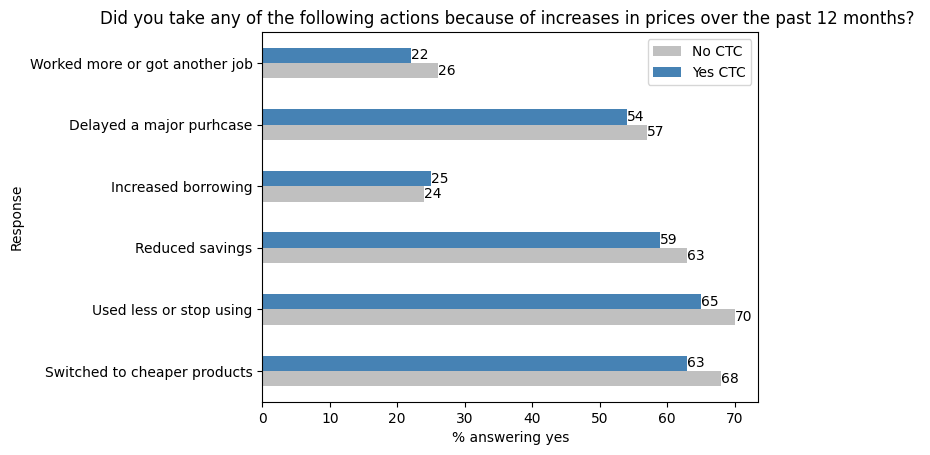

In [101]:
index = ['Switched to cheaper products','Used less or stop using','Reduced savings','Increased borrowing','Delayed a major purhcase','Worked more or got another job']
INF3_comp = pd.DataFrame({'No CTC': [68,70,63,24,57,26],
                   'Yes CTC': [63,65,59,25,54,22]}, index=index)
INF3_comp_graph = INF3_comp.plot.barh(rot=0,color = {"No CTC": "silver", "Yes CTC": "steelblue"})
INF3_comp_graph.set_xlabel("% answering yes")
INF3_comp_graph.set_ylabel("Response")
INF3_comp_graph.set_title("Did you take any of the following actions because of increases in prices over the past 12 months? ")
for container in INF3_comp_graph.containers:
    INF3_comp_graph.bar_label(container,fmt="%d")

In [102]:
#ctc usage percentage
ctc_percentage = pd.DataFrame()
ctc_percentage["Category"] = ["Paid off debt","Saved it","Spent on food","Spent on enrichment or education for child","Spent on other things for child","Spent on rent, mortgage or utilities","Spent on other things"]
list_of_yes = [385,841,564,281,629,534,247]
list_of_yes = [int(x/1182 * 100) for x in list_of_yes]
ctc_percentage["% Answering Yes"] = list_of_yes

In [103]:
list_of_largest = [182,703,218,138,235,305,101]
list_of_largest = [int(x/1182 * 100) for x in list_of_largest]
ctc_percentage["% Saying largest portion"] = list_of_largest

In [104]:
analysis_2021 = filtered_2021_a.loc[filtered_2021_a["CTC1"] == "Yes"]

In [105]:
analysis_2021.groupby("ppinc7").count()

,CaseID,CTC1,I40,CTC3
ppinc7,,,,
"$10,000 to $24,999",45,45,45,45
"$100,000 to $149,999",127,127,127,127
"$150,000 or more",167,167,167,167
"$25,000 to $49,999",79,79,79,79
"$50,000 to $74,999",80,80,80,80
"$75,000 to $99,999",73,73,73,73
"Less than $10,000",13,13,13,13


In [106]:
analysis_2021 = analysis_2021.groupby(["ppinc7","CTC3"]).count()
analysis_2021

CaseID  ...  I40
ppinc7               CTC3                                                ...     
$10,000 to $24,999   Paid off debt                                    2  ...    2
                     Saved it                                         3  ...    3
                     Spent on enrichment or education for child       1  ...    1
                     Spent on food                                    4  ...    4
                     Spent on other things                            2  ...    2
                     Spent on other things for child                 10  ...   10
                     Spent on rent, mortgage, or utilities           23  ...   23
$100,000 to $149,999 Paid off debt                                   11  ...   11
                     Saved it                                        59  ...   59
                     Spent on enrichment or education for child       7  ...    7
                     Spent on food                                   12  ...   12
                     Spent on other things                           13  ...   13
                     Spent on other things for child                 15  ...   15
                     Spent on rent, mortgage, or utilities           10  ...   10
$150,000 or more     Paid off debt                                   18  ...   18
                     Saved it                                        99  ...   99
                     Spent on enrichment or education for child      17  ...   17
                     Spent on food                                   10  ...   10
                     Spent on other things                            8  ...    8
                     Spent on other things for child                 11  ...   11
                     Spent on rent, mortgage, or utilities            4  ...    4
$25,000 to $49,999   Paid off debt                                    8  ...    8
                     Saved it                                        18  ...   18
                     Spent on enrichment or education for child       3  ...    3
                     Spent on food                                   18  ...   18
                     Spent on other things                            3  ...    3
                     Spent on other things for child                 10  ...   10
                     Spent on rent, mortgage, or utilities           19  ...   19
$50,000 to $74,999   Paid off debt                                   12  ...   12
                     Saved it                                        18  ...   18
                     Spent on enrichment or education for child       4  ...    4
                     Spent on food                                    8  ...    8
                     Spent on other things                            2  ...    2
                     Spent on other things for child                 12  ...   12
                     Spent on rent, mortgage, or utilities           24  ...   24
$75,000 to $99,999   Paid off debt                                    7  ...    7
                     Saved it                                        34  ...   34
                     Spent on enrichment or education for child       7  ...    7
                     Spent on food                                    9  ...    9
                     Spent on other things                            1  ...    1
                     Spent on other things for child                  9  ...    9
                     Spent on rent, mortgage, or utilities            6  ...    6
Less than $10,000    Paid off debt                                    1  ...    1
                     Saved it                                         1  ...    1
                     Spent on enrichment or education for child       1  ...    1
                     Spent on food                                    3  ...    3
                     Spent on other things for child                  2  ...    2
                     Spent on rent, mortgage, o

In [107]:
income_by_large_ctc_val = analysis_2021["CaseID"].values
income_by_large_ctc_val

array([ 2,  3,  1,  4,  2, 10, 23, 11, 59,  7, 12, 13, 15, 10, 18, 99, 17,
       10,  8, 11,  4,  8, 18,  3, 18,  3, 10, 19, 12, 18,  4,  8,  2, 12,
       24,  7, 34,  7,  9,  1,  9,  6,  1,  1,  1,  3,  2,  5])

In [108]:
sum(income_by_large_ctc_val)

584

In [109]:
less_than_ten_k_val = income_by_large_ctc_val[42:48]
ten_k_to_twenty_five_k_val = income_by_large_ctc_val[0:7]
twenty_five_k_to_fifty_k_val = income_by_large_ctc_val[21:28]
fifty_k_to_seventy_five_k_val = income_by_large_ctc_val[28:35]
seventy_five_k_to_one_hundred_k_val = income_by_large_ctc_val[35:42]
one_hundred_to_one_hundred_n_fifty_val = income_by_large_ctc_val[7:14]
over_one_hundred_n_fifty_k_val = income_by_large_ctc_val[14:21]

In [110]:
def turn_into_percent(lists):
    total = sum(lists)
    result = [int(x/total * 100) for x in lists]
    return result
less_than_ten_k_val_percent = [7,7,7,23,0,15,38]
ten_k_to_twenty_five_k_val_percent = turn_into_percent(ten_k_to_twenty_five_k_val)
twenty_five_k_to_fifty_k_val_percent = turn_into_percent(twenty_five_k_to_fifty_k_val)
fifty_k_to_seventy_five_k_val_percent = turn_into_percent(fifty_k_to_seventy_five_k_val)
seventy_five_k_to_one_hundred_k_val_percent = turn_into_percent(seventy_five_k_to_one_hundred_k_val)
one_hundred_to_one_hundred_n_fifty_val_percent = turn_into_percent(one_hundred_to_one_hundred_n_fifty_val)
over_one_hundred_n_fifty_k_val_percent = turn_into_percent(over_one_hundred_n_fifty_k_val)

In [111]:
ctc_spending = pd.DataFrame()
ctc_spending["Category"] = ["Paid off debt","Saved it","Spent on enrichment or education for child","Spent on food","Spent on other things","Spent on other things for child","Spent on rent, mortage, or utilities"]
ctc_spending["<10K"] = less_than_ten_k_val_percent
ctc_spending["10k-25k"] = ten_k_to_twenty_five_k_val_percent
ctc_spending["25k-50k"] = twenty_five_k_to_fifty_k_val_percent
ctc_spending["50k-75k"] = fifty_k_to_seventy_five_k_val_percent
ctc_spending["75k-100k"] = seventy_five_k_to_one_hundred_k_val_percent
ctc_spending["100k-150k"] = one_hundred_to_one_hundred_n_fifty_val_percent
ctc_spending[">150k"] = over_one_hundred_n_fifty_k_val_percent
ctc_spending

,Category,<10K,10k-25k,25k-50k,50k-75k,75k-100k,100k-150k,>150k
0,Paid off debt,7,4,10,15,9,8,10
1,Saved it,7,6,22,22,46,46,59
2,Spent on enrichment or education for child,7,2,3,5,9,5,10
3,Spent on food,23,8,22,10,12,9,5
4,Spent on other things,0,4,3,2,1,10,4
5,Spent on other things for child,15,22,12,15,12,11,6
6,"Spent on rent, mortage, or utilities",38,51,24,30,8,7,2


In [112]:
ctc_spending = ctc_spending.T
ctc_spending

,0,1,2,3,4,5,6
Category,Paid off debt,Saved it,Spent on enrichment or education for child,Spent on food,Spent on other things,Spent on other things for child,"Spent on rent, mortage, or utilities"
<10K,7,7,7,23,0,15,38
10k-25k,4,6,2,8,4,22,51
25k-50k,10,22,3,22,3,12,24
50k-75k,15,22,5,10,2,15,30
75k-100k,9,46,9,12,1,12,8
100k-150k,8,46,5,9,10,11,7
>150k,10,59,10,5,4,6,2


Text(0.5, 1.0, 'How did you use the largest portion of the monthly Child Tax Credit payments that you received?')

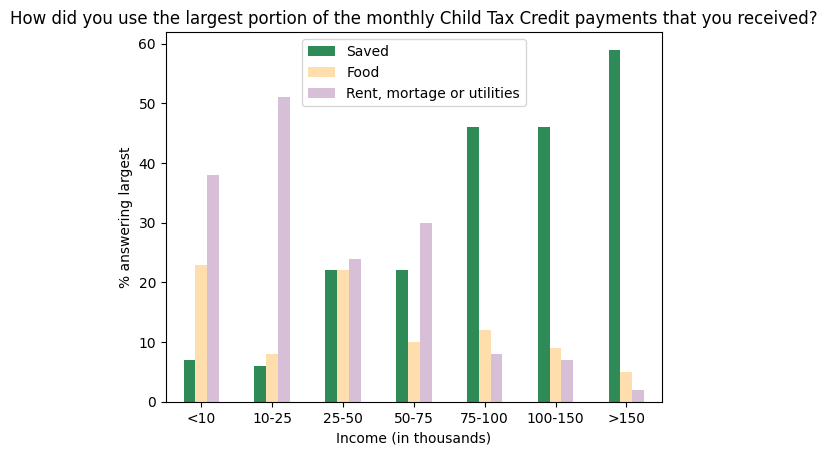

In [113]:

index = ['<10','10-25','25-50','50-75','75-100','100-150','>150']
income_largest = pd.DataFrame({'Saved': [7,6,22,22,46,46,59],
                   'Food': [23,8,22,10,12,9,5] , 'Rent, mortage or utilities': [38,51,24,30,8,7,2] }, index=index)
income_largest_graph = income_largest.plot.bar(rot=0, color = {"Saved": "seagreen", "Food": "navajowhite", "Rent, mortage or utilities": "thistle"})
income_largest_graph.set_xlabel("Income (in thousands)")
income_largest_graph.set_ylabel("% answering largest")
income_largest_graph.set_title("How did you use the largest portion of the monthly Child Tax Credit payments that you received?")
#for container in income_largest_graph.containers:
   # income_largest_graph.bar_label(container,fmt="%d")

[Text(0, 0, '32'),
 Text(0, 0, '71'),
 Text(0, 0, '47'),
 Text(0, 0, '23'),
 Text(0, 0, '53'),
 Text(0, 0, '45'),
 Text(0, 0, '20')]

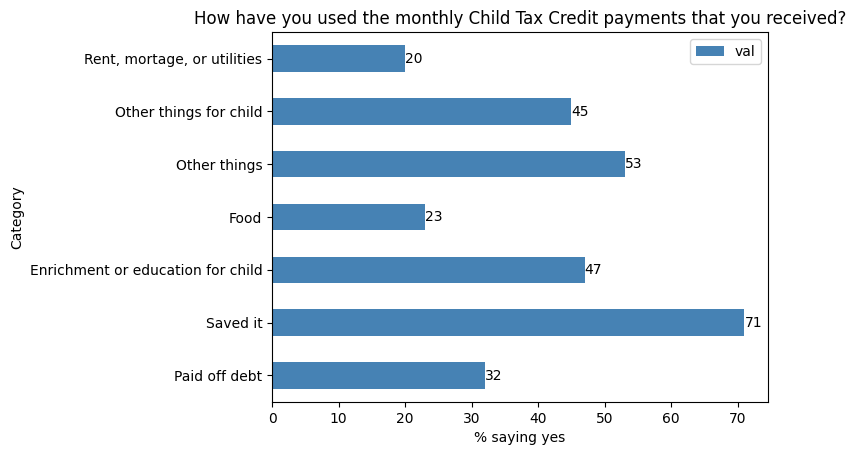

In [114]:
most_pop_ctc = pd.DataFrame({'Category':["Paid off debt","Saved it","Enrichment or education for child","Food","Other things","Other things for child","Rent, mortage, or utilities"], 'val':ctc_percentage["% Answering Yes"].values})
most_pop_ctc_graph = most_pop_ctc.plot.barh(x='Category', y='val', rot=0, color = ["steelblue"])
most_pop_ctc_graph.set_xlabel("% saying yes")
most_pop_ctc_graph.set_title("How have you used the monthly Child Tax Credit payments that you received?")
most_pop_ctc_graph.bar_label(most_pop_ctc_graph.containers[0],fmt="%d")